# Project: Concrete compressive strength

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

### Abstract:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

### Source:

Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh '@' chu.edu.tw
TEL:886-3-5186511

Date Donated: August 3, 2007


### Data Set Information:

Number of instances 1030
Number of Attributes 9
Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values None


### Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable



### Relevant Papers:

Main
1. I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

Others
2. I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).
3. I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks," J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).
4. I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic Engineering, Vol. 15, No. 4, pp. 659-663 (2003).
5. I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 1, pp. 77-84 (2003).
6. Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and neural networks," Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, pp.597-604 (2006).



### Citation Request:

NOTE: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

<h4>Steps:</h4>
<ol>
  <li>Data Analysis</li>
  <li>Feature Engineering</li>
  <li>Feature Selection</li>
  <li>Model Training</li>
  <li>Obtaining Predictions / Scoring</li>
</ol>

<b>Dependencies and versions</b>

In [1]:
# importing libraries
from platform import python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats # for Q-Q plots

import warnings
warnings.filterwarnings("ignore")

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)

Python version: 3.8.8
NumPy version: 1.20.2
Pandas version: 1.2.4
SciPy version: 1.6.2


<h2>STEP 1: Data analysis</h2>

In [3]:
# importing the dataset
df = pd.read_excel('Concrete_Data.xls')

In [4]:
# showing the column names
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
# replacing columns' names with shorter ones
df.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'] 

In [6]:
# shape
df.shape

(1030, 9)

In [7]:
# showing first five rows of the dateset
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
# showing data types
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [9]:
# checking duplicated rows
df.duplicated().sum()

25

In [10]:
# deleting the duplicated rows
df.drop_duplicates(inplace=True)

In [11]:
# checking duplicated rows
df.duplicated().sum()

0

In [12]:
# checking rows with missing values
df.isnull().any(axis = 1).sum()

0

<b>The target variable</b>

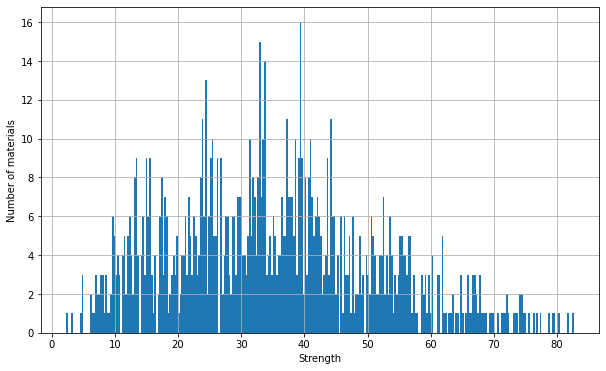

Skewness = 0.40


In [13]:
# histogran to evaluate target distribution
df['Strength'].hist(bins=300, figsize=(10, 6))
plt.ylabel('Number of materials')
plt.xlabel('Strength')
plt.show()
print('Skewness = {:.2f}'.format(df['Strength'].skew()))

<b>Numerical variables</b>

In [14]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var != 'Strength']
# number of numerical variables
len(num_vars)

8

<b>Discrete variables</b>

In [15]:
#  making a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [16]:
#discrete variables
df[discrete_vars].head()

,Age
0,28
1,28
2,270
3,365
4,360


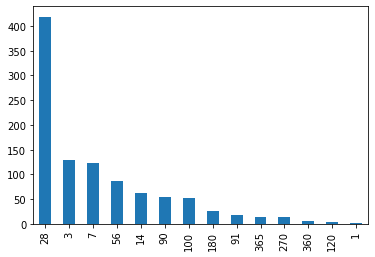

In [17]:
# ploting a barplot for all discrete variables
for variable in discrete_vars:
    df[variable].value_counts().plot.bar(figsize=(6,4))
    plt.show()

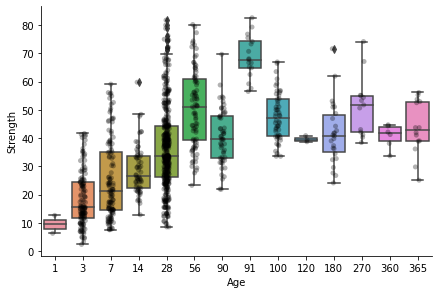

In [18]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='Strength', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='Strength', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Till age of 90 this variable increases, then flat

<b>Continuous variables</b>

In [19]:
# makink list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


In [20]:
#continuous variables
df[cont_vars].head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


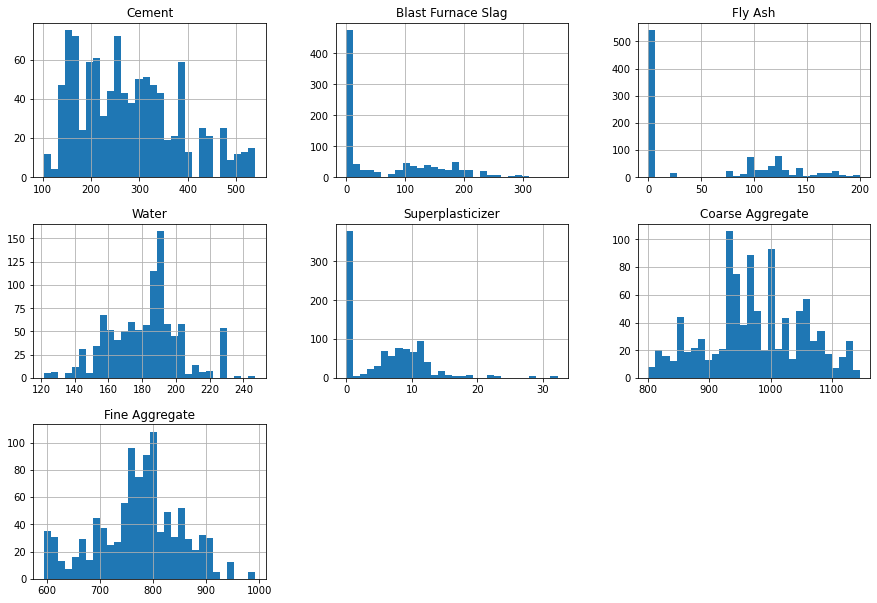

In [21]:
# plotting histograms for all continuous numerical variables
df[cont_vars].hist(bins=30, layout=(7,3) ,figsize=(15,25))
plt.show()

In [22]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

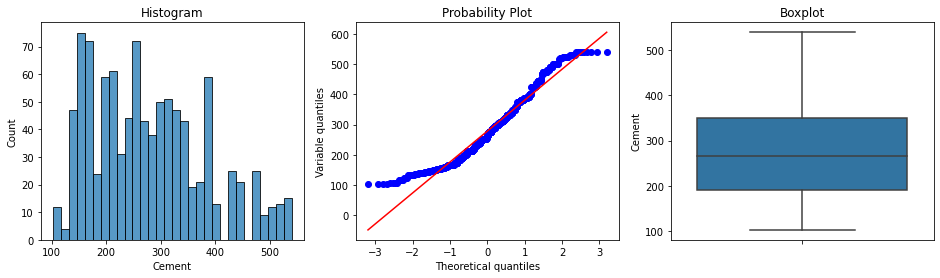

skewness of Cement is 0.56


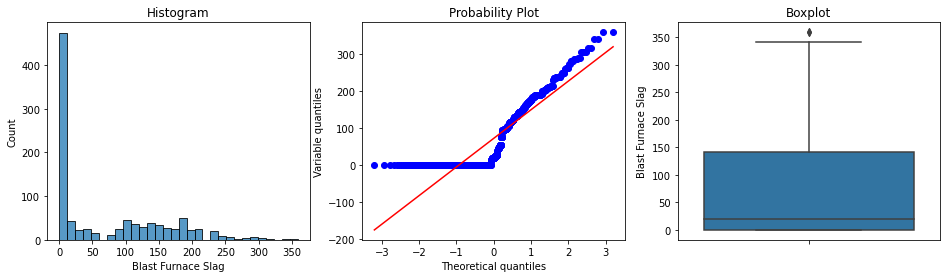

skewness of Blast Furnace Slag is 0.86


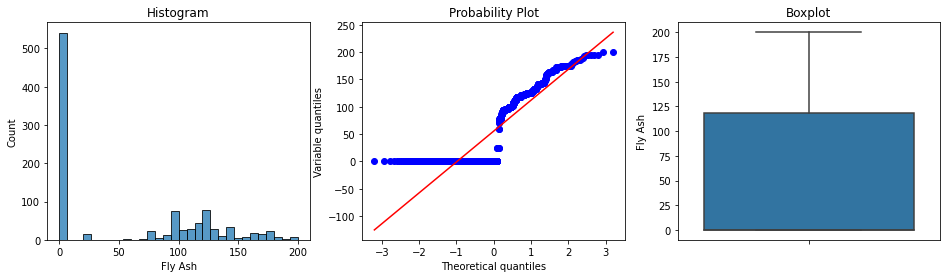

skewness of Fly Ash is 0.50


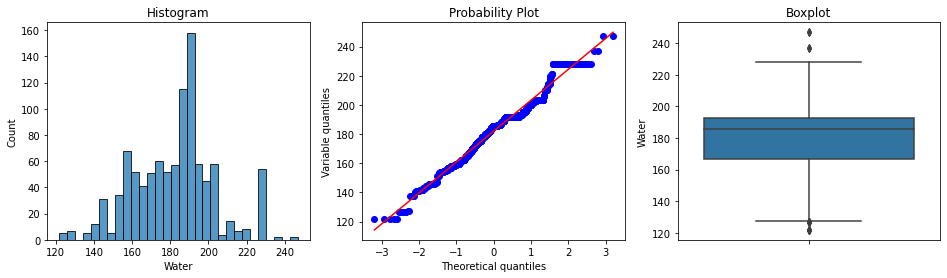

skewness of Water is 0.03


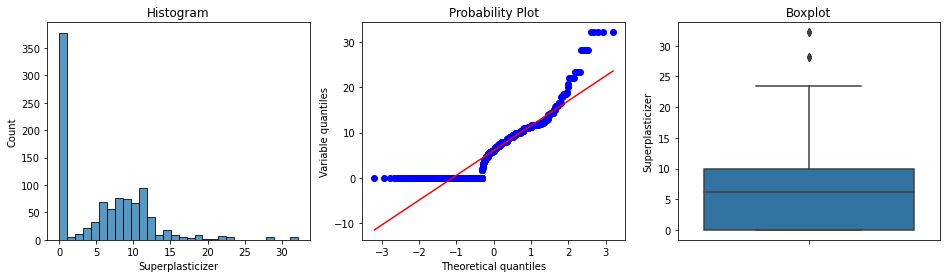

skewness of Superplasticizer is 0.98


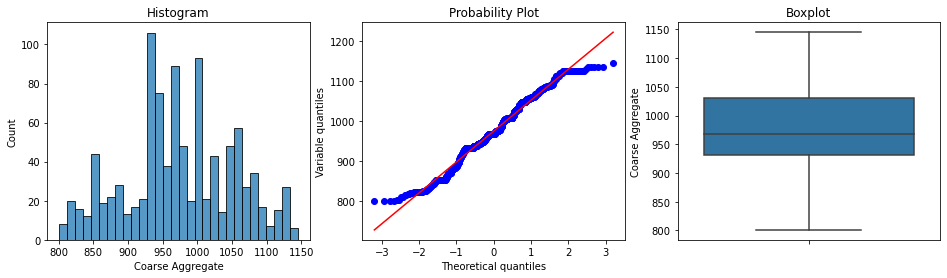

skewness of Coarse Aggregate is -0.07


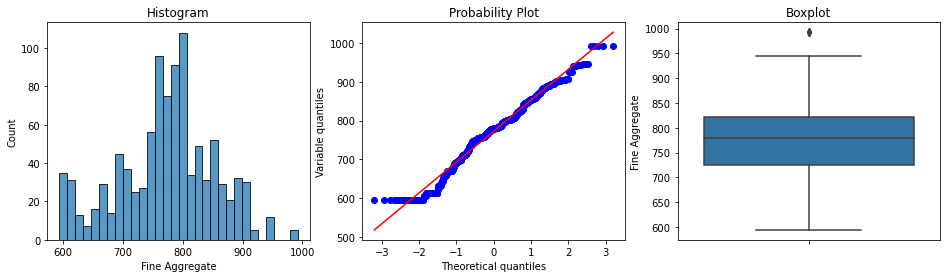

skewness of Fine Aggregate is -0.25


In [23]:
# plotting the continuous variables
for variable in cont_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

All the continious variables are reasonably skewed

Variavles 'Blast Furnace Slag', 'Fly Ash' and 'Superplasticizer' have quite a lot zeroes. Transforming them into binary variables to see how predictive they are:

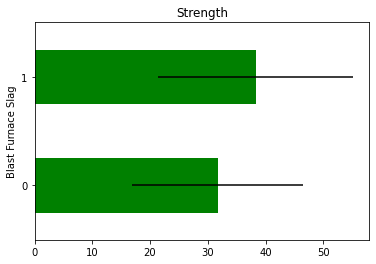

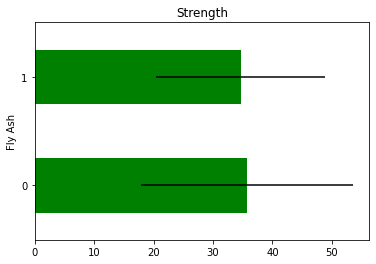

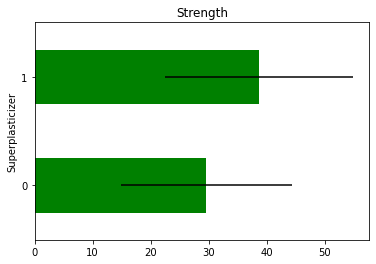

In [24]:
for var in cont_vars:
    
    tmp = df.copy()
    
    if np.in1d([0], tmp[var].values):
    
        # mapping the variable values into 0 and 1
        tmp[var] = np.where(tmp[var] == 0, 0, 1)
        
        # determine mean sale price in the mapped values
        tmp = tmp.groupby(var)['Strength'].agg(['mean', 'std'])

        # plot into a bar graph
        tmp.plot(kind="barh", y="mean", legend=False, xerr="std", title="Strength", color='green')


        plt.show()

Variavles 'Blast Furnace Slag' and 'Superplasticizer' seem to be predictive, rather than 'Fly Ash' - not.